In [10]:
from pyspark.sql import SparkSession
from pyspark import *

In [11]:
sparkSession = SparkSession.builder.appName("example-pyspark-read-and-write").getOrCreate()

In [12]:
df_load = sparkSession.read.csv('hdfs://localhost:9000/khoa_hoc_co_ban.csv', header = True)

In [13]:
df_load.select("Tác giả").show()

+--------------------+
|             Tác giả|
+--------------------+
|     Fredrik Backman|
|      Elyakim Kislev|
|Kang Sang Wook, L...|
|     Madeline Miller|
|             Bắc Nam|
|    Shizukui Shusuke|
|       Nhiều tác giả|
|        Jim B Tucker|
|        Gari Chapman|
|        Damon Galgut|
|      Jeffery Deaver|
| Thích Nữ Nhuận Bình|
|       Steven Pinker|
|         Miura Shion|
|     Astrid Lindgren|
|      Phạm Phú Quảng|
|Alex Alpha – Huyề...|
|       Nhiều tác giả|
|    Suzanne M Paling|
|         Whon Jaehun|
+--------------------+
only showing top 20 rows



In [14]:
df_load = df_load.toPandas()

In [15]:
display(df_load)

,_c0,Tieu de,Tác giả,Người dịch,Nhà xuất bản,Nhà phát hành,Mã Sản phẩm,Giấy phép XB,Khối lượng,Ngôn ngữ,Định dạng,Kích thước,Ngày phát hành,Số trang
0,0,Người Đàn Ông Mang Tên Ove,Fredrik Backman,Fredrik Backman,Nxb Trẻ,NXB Trẻ,8934974182375,NaN,NaN,Tiếng Việt,Bìa mềm,13 x 20 cm,2022,452
1,1,Mối Quan Hệ 5.0,Elyakim Kislev,NaN,NXB Công Thương,NaN,8935280913110,NaN,610.00 gam,Tiếng Việt,Bìa mềm,24 x 15.5 cm,2023,360
2,2,Đừng Chết Bởi Hóa Chất (Tái Bản 2022),"Kang Sang Wook, Lee Jun Young",NaN,Nxb Thế giới,NaN,8935280912397,NaN,500.00 gam,Tiếng Việt,Bìa mềm,20.5 x 14 cm,2022,256
3,3,Circe,Madeline Miller,NaN,NXB Kim Đồng,NXB Kim Đồng,8935244874488,NaN,750.00 gam,Tiếng Việt,Bìa mềm,22.5 x 14.5 cm,2022,528
4,4,Toái Ngọc Đầu Châu,Bắc Nam,NaN,Nxb Hà Nội,AZ Việt Nam,8935325003264,-QĐ/HN,950.00 gam,Tiếng Việt,Bìa mềm,20.5 x 14.5 cm,2022,928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,25,Giấc Mơ Kỳ Lạ Của Luy-Xiêng,Jean Marc Mathis,"Đặng Minh Quân , Lê Chúc An",Nxb Hà Nội,Nhã Nam,8935235230484,NaN,200.00 gam,Tiếng Việt,Bìa mềm,19 x 14.5 cm,06/07/2021,48
566,26,"Luy-Xiêng, Cậu Sẽ Bị Ăn Thịt Mất",Jean Marc Mathis,"Đặng Minh Quân , Lê Chúc An",Nxb Hà Nội,Nhã Nam,8935235230460,NaN,200.00 gam,Tiếng Việt,Bìa mềm,19 x 14.5 cm,06/07/2021,48
567,27,Gió Bụi Đầy Trời - Bìa Cứng,Thiên Sơn,NaN,Nxb Hội Nhà Văn,Nhã Nam,8935235230606,NaN,1000.00 gam,Tiếng Việt,Bìa cứng,24 x 15.5 cm,02/07/2021,440
568,28,Điều Hay Việc Tốt - Tử Tế,Alison Green,Hoàng Ly,Nxb Trẻ,NXB Trẻ,8934974174141,NaN,200.00 gam,Tiếng Việt,Bìa mềm,24 x 19 cm,02/07/2021,48


In [16]:
type(df_load)

pandas.core.frame.DataFrame

Data distribution analysys


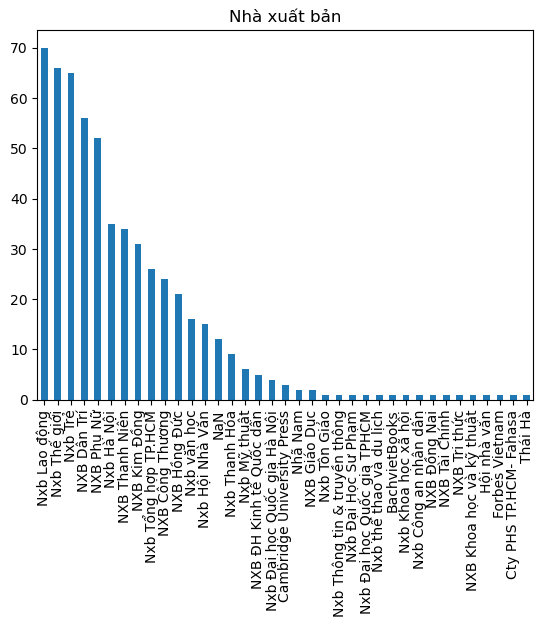

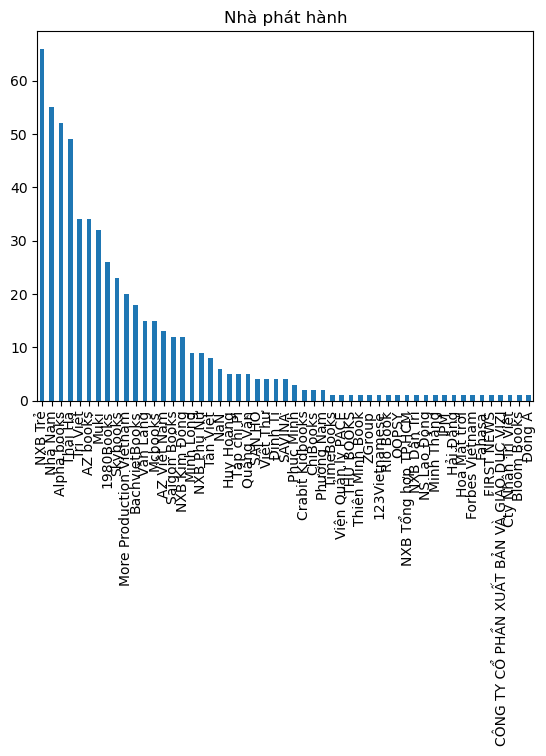

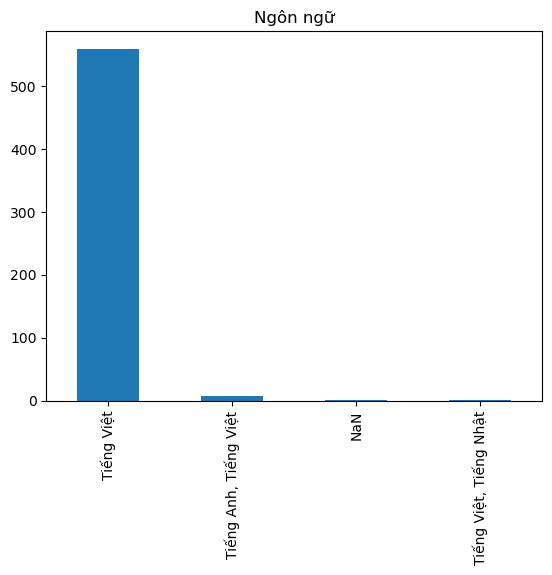

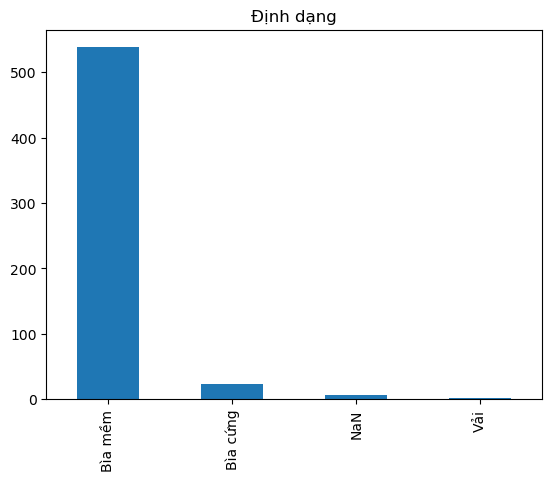

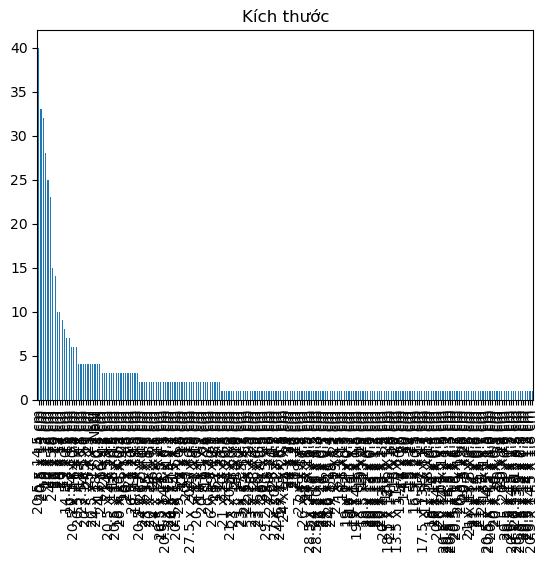

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

variables = ['Nhà xuất bản','Nhà phát hành','Ngôn ngữ','Định dạng','Kích thước']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    df_load = df_load.sort_values(by=[v])
    df_load[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()